# Analysis of Netflix Movies and TV Shows

### About this dataset
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. 

This dataset is from kaggle: https://www.kaggle.com/shivamb/netflix-shows/version/5

Questions: 
* Does Netflix has more focus on TV Shows than movies in recent years?
* Which type of movie is popular?
           

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/netflix_titles.csv")
df.describe()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=8807, step=1)

### Check the number of movies and TV shows added by Netflix in each year

In [5]:
df['year'] = pd.DatetimeIndex(df['date_added']).year
df1 = df.groupby(['year','type']).count()
df1['number'] = df1['show_id']
df1 = df1[['number']]
df1

number
year   type           
2008.0 Movie         1
       TV Show       1
2009.0 Movie         2
2010.0 Movie         1
2011.0 Movie        13
2012.0 Movie         3
2013.0 Movie         6
       TV Show       5
2014.0 Movie        19
       TV Show       5
2015.0 Movie        56
       TV Show      26
2016.0 Movie       253
       TV Show     176
2017.0 Movie       839
       TV Show     349
2018.0 Movie      1237
       TV Show     412
2019.0 Movie      1424
       TV Show     592
2020.0 Movie      1284
       TV Show     595
2021.0 Movie       993
       TV Show     505

<AxesSubplot:xlabel='year'>

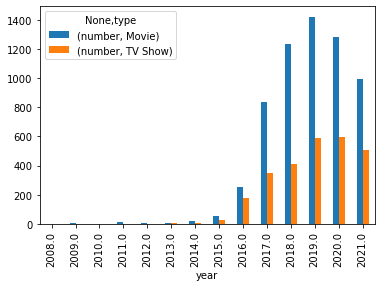

In [6]:
df1.unstack().plot(kind='bar', stacked=False)

### Create a pivot table

In [7]:
df2 = df.groupby(['director']).count()
df2['number'] = df2['show_id']
df2 = df2[['number']]
df2

,number
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [8]:
df2 = pd.pivot_table(df, values='rating', index = ['release_year'], columns=['listed_in'], aggfunc='count')
df2

listed_in,Action & Adventure,"Action & Adventure, Anime Features","Action & Adventure, Anime Features, Children & Family Movies","Action & Adventure, Anime Features, Classic Movies","Action & Adventure, Anime Features, Horror Movies","Action & Adventure, Anime Features, International Movies","Action & Adventure, Anime Features, Sci-Fi & Fantasy","Action & Adventure, Children & Family Movies","Action & Adventure, Children & Family Movies, Classic Movies","Action & Adventure, Children & Family Movies, Comedies",...,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","TV Dramas, TV Thrillers","TV Dramas, Teen TV Shows","TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","TV Horror, TV Mysteries, TV Thrillers","TV Horror, TV Mysteries, Teen TV Shows","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers",TV Shows,Thrillers
release_year,,,,,,,,,,,,,,,,,,,,,
1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,8.0
2018,12.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0
2019,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,2.0,10.0


In [9]:
df2 = df2.tail(10)

In [10]:
df3 = pd.DataFrame(df2.sum())
df3.columns=['number']
df4 = df3.sort_values('number',ascending = False)
df4 = df4.head(10)
df4

,number
listed_in,
Documentaries,337.0
Stand-Up Comedy,298.0
"Dramas, International Movies",280.0
"Dramas, Independent Movies, International Movies",217.0
"Comedies, Dramas, International Movies",200.0
Kids' TV,185.0
"Documentaries, International Movies",174.0
Children & Family Movies,173.0
"Comedies, International Movies",145.0


Text(0, 0.5, 'number')

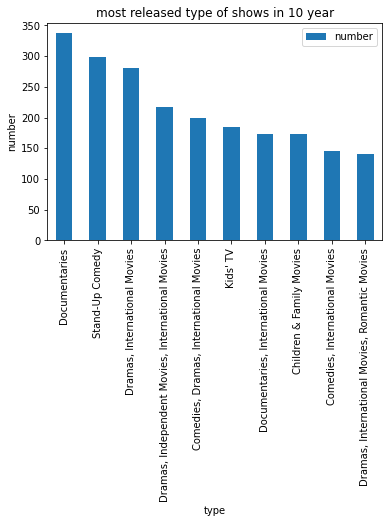

In [11]:
df4.plot(kind = 'bar')
plt.title('most released type of shows in 10 year')
plt.xlabel('type')
plt.ylabel('number')